In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

print("Libraries imported successfully!")

Libraries imported successfully!


# Load Train, Validation, and Test Sets

In [20]:
# Load the datasets
processed_data_dir = '../1_DatasetCharacteristics/notebooks/Archive'

# Load train, validation, and test sets
train_df = pd.read_csv(f'{processed_data_dir}/train_set_imputed.csv', parse_dates=['Datum'])
val_df = pd.read_csv(f'{processed_data_dir}/validation_set_imputed.csv', parse_dates=['Datum'])
test_df = pd.read_csv(f'{processed_data_dir}/test_set_imputed.csv', parse_dates=['Datum'])

print("Datasets loaded successfully!\n")
print(f"Training set shape: {train_df.shape}")
print(f"Validation set shape: {val_df.shape}")
print(f"Test set shape: {test_df.shape}")
print(f"\nColumn names: {train_df.columns.tolist()}")
print(f"\nFirst few rows of training set:")
print(train_df.head())

Datasets loaded successfully!

Training set shape: (7493, 48)
Validation set shape: (1841, 48)
Test set shape: (1839, 48)

Column names: ['Datum', 'id', 'Warengruppe', 'Umsatz', 'KielerWoche', 'Bewoelkung', 'Temperatur', 'Windgeschwindigkeit', 'Wettercode', 'Niederschlag', 'is_holiday', 'Temperatur_imputed', 'Bewoelkung_imputed', 'Windgeschw_imputed', 'Niederschlag_imputed', 'Wettercode_imputed', 'Warengruppe_1.0', 'Warengruppe_2.0', 'Warengruppe_3.0', 'Warengruppe_4.0', 'Warengruppe_5.0', 'Warengruppe_6.0', 'Warengruppe_nan', 'Weekday_Monday', 'Weekday_Tuesday', 'Weekday_Wednesday', 'Weekday_Thursday', 'Weekday_Friday', 'Weekday_Saturday', 'Weekday_Sunday', 'Temperatur_7day_rolling', 'Niederschlag_trocken', 'Niederschlag_nass', 'Niederschlag_7day_rolling', 'W_Cat_-1', 'W_Cat_1', 'W_Cat_2', 'W_Cat_3', 'W_Cat_4', 'W_Cat_5', 'W_Cat_6', 'W_Cat_7', 'W_Cat_8', 'W_Cat_9', 'W_Cat_10', 'Temperatur_kalt', 'Temperatur_normal', 'Temperatur_warm']

First few rows of training set:
       Datum     

# Prepare Features and Target Variable

In [21]:
# Identify feature columns (exclude id, Datum, and target variable Umsatz)
exclude_cols = ['id', 'Datum', 'Umsatz']
feature_cols = [col for col in train_df.columns if col not in exclude_cols]

print(f"Feature columns ({len(feature_cols)}): {feature_cols}\n")

# Prepare X (features) and y (target)
X_train = train_df[feature_cols].copy()
y_train = train_df['Umsatz'].copy()

X_val = val_df[feature_cols].copy()
y_val = val_df['Umsatz'].copy()

X_test = test_df[feature_cols].copy()
y_test = test_df['Umsatz'].copy()

print(f"Before handling missing values:")
print(f"X_train shape: {X_train.shape}, Missing values: {X_train.isnull().sum().sum()}")
print(f"X_val shape: {X_val.shape}, Missing values: {X_val.isnull().sum().sum()}")
print(f"X_test shape: {X_test.shape}, Missing values: {X_test.isnull().sum().sum()}")
print(f"y_train missing: {y_train.isnull().sum()}, y_val missing: {y_val.isnull().sum()}, y_test missing: {y_test.isnull().sum()}")

# For train and validation sets, remove rows with missing target values
valid_train_idx = ~y_train.isnull()
valid_val_idx = ~y_val.isnull()

X_train = X_train[valid_train_idx].copy()
y_train = y_train[valid_train_idx].copy()

X_val = X_val[valid_val_idx].copy()
y_val = y_val[valid_val_idx].copy()

# For test set, keep all rows since target values are naturally missing
X_test = X_test.copy()
y_test = y_test.copy()

print(f"\nAfter removing rows with missing target values (train/val only):")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# Handle missing values in features - fill with mean from training set
# Calculate mean for each feature from training set
feature_means = X_train.mean()

# Fill missing values in all sets
X_train.fillna(feature_means, inplace=True)
X_val.fillna(feature_means, inplace=True)
X_test.fillna(feature_means, inplace=True)

print(f"\nAfter handling missing values in features:")
print(f"X_train missing values: {X_train.isnull().sum().sum()}")
print(f"X_val missing values: {X_val.isnull().sum().sum()}")
print(f"X_test missing values: {X_test.isnull().sum().sum()}")
print(f"y_train missing values: {y_train.isnull().sum()}")
print(f"y_val missing values: {y_val.isnull().sum()}")

Feature columns (45): ['Warengruppe', 'KielerWoche', 'Bewoelkung', 'Temperatur', 'Windgeschwindigkeit', 'Wettercode', 'Niederschlag', 'is_holiday', 'Temperatur_imputed', 'Bewoelkung_imputed', 'Windgeschw_imputed', 'Niederschlag_imputed', 'Wettercode_imputed', 'Warengruppe_1.0', 'Warengruppe_2.0', 'Warengruppe_3.0', 'Warengruppe_4.0', 'Warengruppe_5.0', 'Warengruppe_6.0', 'Warengruppe_nan', 'Weekday_Monday', 'Weekday_Tuesday', 'Weekday_Wednesday', 'Weekday_Thursday', 'Weekday_Friday', 'Weekday_Saturday', 'Weekday_Sunday', 'Temperatur_7day_rolling', 'Niederschlag_trocken', 'Niederschlag_nass', 'Niederschlag_7day_rolling', 'W_Cat_-1', 'W_Cat_1', 'W_Cat_2', 'W_Cat_3', 'W_Cat_4', 'W_Cat_5', 'W_Cat_6', 'W_Cat_7', 'W_Cat_8', 'W_Cat_9', 'W_Cat_10', 'Temperatur_kalt', 'Temperatur_normal', 'Temperatur_warm']

Before handling missing values:
X_train shape: (7493, 45), Missing values: 0
X_val shape: (1841, 45), Missing values: 0
X_test shape: (1839, 45), Missing values: 9
y_train missing: 0, y_val

# Scale Features

In [22]:
# Standardize the features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully!")
print(f"Mean of scaled X_train: {X_train_scaled.mean(axis=0)[:5]}")  # Show first 5 features
print(f"Std of scaled X_train: {X_train_scaled.std(axis=0)[:5]}")    # Show first 5 features

Features scaled successfully!
Mean of scaled X_train: [-5.31034208e-17 -7.58620297e-18  2.04827480e-16 -4.93103193e-17
  9.86206386e-17]
Std of scaled X_train: [1. 1. 1. 1. 1.]


# Train Linear Regression Model

In [23]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("Linear Regression model trained successfully!")
print(f"Number of features: {len(model.coef_)}")
print(f"Model intercept: {model.intercept_:.4f}")
print(f"\nTop 5 feature coefficients (in absolute value):")
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': model.coef_,
    'Abs_Coefficient': np.abs(model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print(feature_importance.head())

Linear Regression model trained successfully!
Number of features: 45
Model intercept: 209.3390

Top 5 feature coefficients (in absolute value):
            Feature  Coefficient  Abs_Coefficient
14  Warengruppe_2.0    78.645031        78.645031
16  Warengruppe_4.0   -46.363364        46.363364
13  Warengruppe_1.0   -37.011414        37.011414
17  Warengruppe_5.0    30.303375        30.303375
3        Temperatur    20.484770        20.484770


# Make Predictions and Evaluate Model

In [24]:
# Make predictions on all sets
y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
def evaluate_model(y_true, y_pred, set_name):
    """Calculate and print evaluation metrics"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{set_name} Set Metrics:")
    print(f"  MSE (Mean Squared Error):  {mse:.4f}")
    print(f"  RMSE (Root Mean Squared Error): {rmse:.4f}")
    print(f"  MAE (Mean Absolute Error): {mae:.4f}")
    print(f"  R² Score: {r2:.4f}")
    
    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

# Evaluate on train and validation sets (test set has no target values)
train_metrics = evaluate_model(y_train, y_train_pred, "Training")
val_metrics = evaluate_model(y_val, y_val_pred, "Validation")

print("\n" + "="*60)
print("Test Set Predictions")
print("="*60)
print(f"Test set predictions shape: {y_test_pred.shape}")
print(f"First 10 predictions: {y_test_pred[:10]}")
print(f"Mean prediction: {y_test_pred.mean():.4f}")
print(f"Min prediction: {y_test_pred.min():.4f}")
print(f"Max prediction: {y_test_pred.max():.4f}")

# Create summary DataFrame (only for train and validation)
metrics_summary = pd.DataFrame({
    'Training': train_metrics,
    'Validation': val_metrics
}).T

print("\n" + "="*60)
print("METRICS SUMMARY")
print("="*60)
print(metrics_summary)


Training Set Metrics:
  MSE (Mean Squared Error):  6036.0493
  RMSE (Root Mean Squared Error): 77.6920
  MAE (Mean Absolute Error): 51.1208
  R² Score: 0.7235

Validation Set Metrics:
  MSE (Mean Squared Error):  4995.6013
  RMSE (Root Mean Squared Error): 70.6796
  MAE (Mean Absolute Error): 50.7528
  R² Score: 0.7047

Test Set Predictions
Test set predictions shape: (1839,)
First 10 predictions: [417.7886271   99.27196095 289.94879243 135.14300127 176.99773996
 185.39830916 300.83764043 431.15705232 142.48879536 110.10296811]
Mean prediction: 208.6523
Min prediction: -8.9439
Max prediction: 522.4112

METRICS SUMMARY
                    MSE       RMSE        MAE        R2
Training    6036.049288  77.692016  51.120774  0.723533
Validation  4995.601328  70.679568  50.752782  0.704746


# Visualization

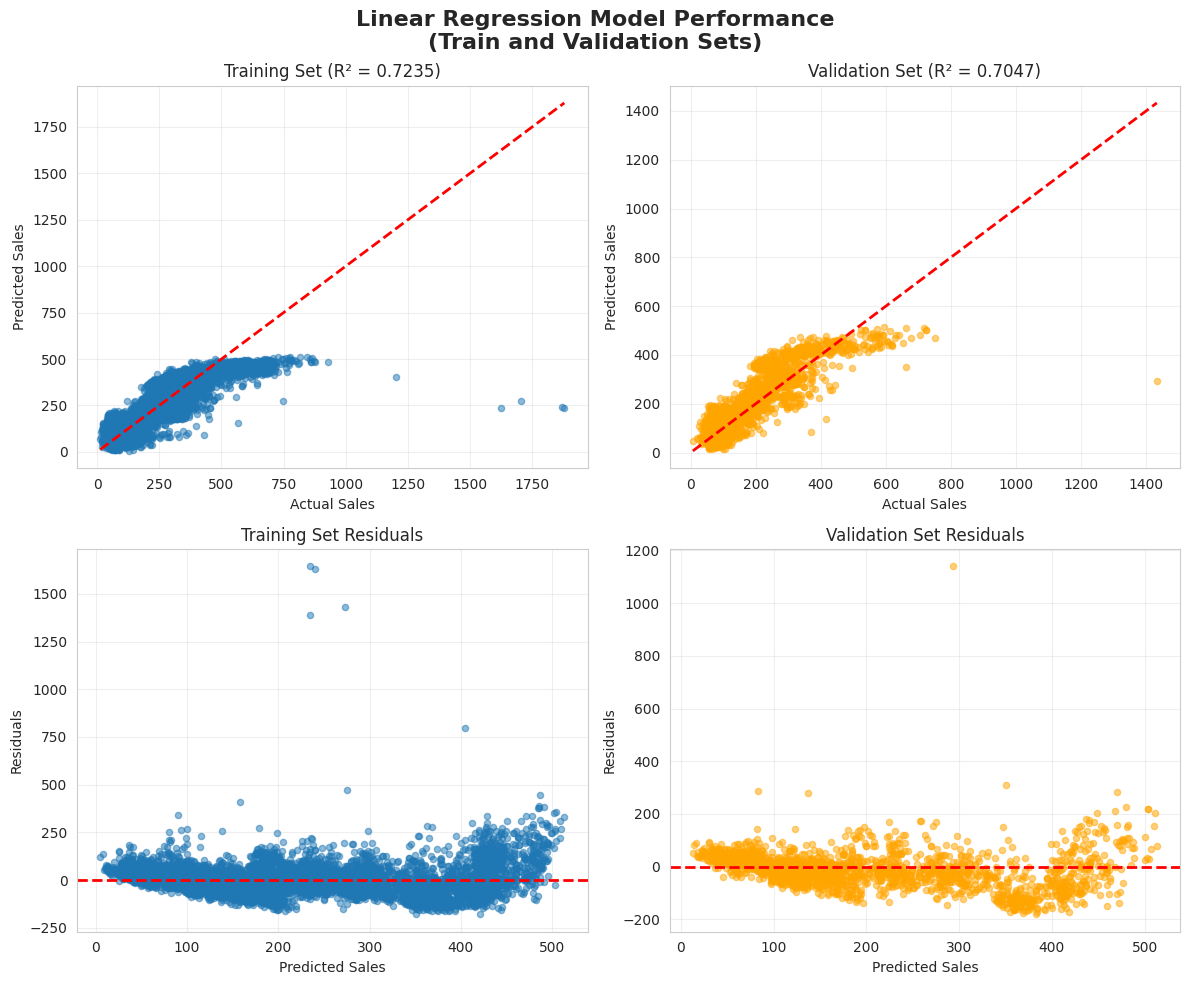

Visualization complete!


In [25]:
# Create visualizations (Train and Validation only, as Test has no target values)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Linear Regression Model Performance\n(Train and Validation Sets)', fontsize=16, fontweight='bold')

# Plot 1: Actual vs Predicted (Train)
axes[0, 0].scatter(y_train, y_train_pred, alpha=0.5, s=20)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Sales')
axes[0, 0].set_ylabel('Predicted Sales')
axes[0, 0].set_title(f'Training Set (R² = {train_metrics["R2"]:.4f})')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Actual vs Predicted (Validation)
axes[0, 1].scatter(y_val, y_val_pred, alpha=0.5, s=20, color='orange')
axes[0, 1].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual Sales')
axes[0, 1].set_ylabel('Predicted Sales')
axes[0, 1].set_title(f'Validation Set (R² = {val_metrics["R2"]:.4f})')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Residuals (Train)
residuals_train = y_train - y_train_pred
axes[1, 0].scatter(y_train_pred, residuals_train, alpha=0.5, s=20)
axes[1, 0].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1, 0].set_xlabel('Predicted Sales')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Training Set Residuals')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Residuals (Validation)
residuals_val = y_val - y_val_pred
axes[1, 1].scatter(y_val_pred, residuals_val, alpha=0.5, s=20, color='orange')
axes[1, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1, 1].set_xlabel('Predicted Sales')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Validation Set Residuals')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Visualization complete!")

# Create Submission File

In [26]:
# Load sample submission to match IDs
sample_submission = pd.read_csv('./sample_submission.csv')

print(f"Sample submission shape: {sample_submission.shape}")
print(f"Sample submission columns: {sample_submission.columns.tolist()}")
print(f"First few rows:")
print(sample_submission.head())

# Get the IDs and predictions from test set
test_ids = test_df['id'].values
test_predictions = y_test_pred

print(f"\nTest set shape: {test_ids.shape}")
print(f"Test predictions shape: {test_predictions.shape}")
print(f"NaN IDs in test set: {pd.isna(test_ids).sum()}")

# Create a temporary dataframe with predictions
temp_submission_df = pd.DataFrame({
    'id': test_ids,
    'Umsatz': test_predictions
})

# Remove rows with NaN IDs
temp_submission_df = temp_submission_df[temp_submission_df['id'].notna()].copy()
temp_submission_df['id'] = temp_submission_df['id'].astype(int)

print(f"\nAfter removing NaN IDs: {len(temp_submission_df)} rows")

# Merge with sample submission to ensure exact ID match and order
# This way we use only the IDs that are in the sample submission
submission_df = sample_submission[['id']].copy()
submission_df = submission_df.merge(
    temp_submission_df[['id', 'Umsatz']], 
    on='id', 
    how='left'
)

print(f"\nFinal submission dataframe shape: {submission_df.shape}")
print(f"Final submission columns: {submission_df.columns.tolist()}")
print(f"First few rows:")
print(submission_df.head())
print(f"\nLast few rows:")
print(submission_df.tail())

# Verify no missing predictions
print(f"\nMissing predictions: {submission_df['Umsatz'].isna().sum()}")

# Verify IDs match
print(f"\n" + "="*60)
print("VERIFICATION")
print("="*60)
sample_ids = set(sample_submission['id'].values)
submission_ids = set(submission_df['id'].values)

print(f"Sample submission has {len(sample_ids)} unique IDs")
print(f"Our submission has {len(submission_ids)} unique IDs")
print(f"Number of rows: {len(submission_df)}")
print(f"IDs match with sample: {sample_ids == submission_ids}")

# Save to CSV
output_filepath = './linear_regression_imputed_submission.csv'
submission_df.to_csv(output_filepath, index=False)

print(f"\n" + "="*60)
print(f"Submission file saved successfully!")
print(f"File: {output_filepath}")
print(f"Rows: {len(submission_df)}")
print(f"Columns: {submission_df.columns.tolist()}")
print("="*60)

Sample submission shape: (1830, 2)
Sample submission columns: ['id', 'Umsatz']
First few rows:
        id  Umsatz
0  1808011       0
1  1808021       0
2  1808031       0
3  1808041       0
4  1808051       0

Test set shape: (1839,)
Test predictions shape: (1839,)
NaN IDs in test set: 9

After removing NaN IDs: 1830 rows

Final submission dataframe shape: (1830, 2)
Final submission columns: ['id', 'Umsatz']
First few rows:
        id      Umsatz
0  1808011  135.143001
1  1808021  142.488795
2  1808031  151.332735
3  1808041  190.232395
4  1808051  209.620113

Last few rows:
           id      Umsatz
1825  1812226   93.470202
1826  1812236  104.057256
1827  1812246   51.447505
1828  1812276   59.236449
1829  1812286   60.018603

Missing predictions: 0

VERIFICATION
Sample submission has 1830 unique IDs
Our submission has 1830 unique IDs
Number of rows: 1830
IDs match with sample: True

Submission file saved successfully!
File: ./linear_regression_imputed_submission.csv
Rows: 1830
Colum